In [9]:
from src.LogRegCCD import LogRegCCD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/earthquake_preprocessed.csv')
display(data.head())

,y,body,surface,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5,new_col_6,...,new_col_10,new_col_11,new_col_12,new_col_13,new_col_14,new_col_15,new_col_16,new_col_17,new_col_18,new_col_19
0,0,5.60,4.25,4.952526,3.761873,1.881298,2.769271,4.554636,4.723829,1.752938,...,0.817072,1.363005,1.317405,3.507063,4.660591,5.519134,1.435977,0.832869,5.617340,5.541780
1,0,5.18,3.93,2.063088,3.957895,0.417504,4.846513,4.112686,4.248237,2.949588,...,0.257903,1.520456,1.130833,1.368327,2.825666,2.078076,1.334814,6.399329,3.684705,6.514204
2,0,6.31,6.30,1.860090,3.948091,3.885735,2.615489,4.749000,1.236741,1.961220,...,0.170888,1.191277,1.388039,3.285029,3.483254,2.081719,0.255848,1.428357,4.968425,8.297418
3,0,5.36,4.49,3.882065,0.456031,2.792021,3.146993,3.628598,2.252721,2.187375,...,0.668643,0.943152,0.904134,0.442527,4.612497,4.425007,3.304469,5.221969,3.925139,2.064213
4,0,5.96,6.39,1.704018,2.472102,2.121110,3.478743,3.067076,0.645797,4.520793,...,0.929376,0.823682,2.242828,3.385809,3.536193,2.713308,3.953888,1.905462,2.650192,0.109958


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['y'], test_size=0.2, random_state=2871, stratify=data['y'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lambda_vals = np.logspace(-5, 1, 7)
lambda_vals

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [4]:
# Fit the model
model = LogRegCCD(max_iter=100, lambda_vals=lambda_vals)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)
display(model.results.head())

# Compare with sklearn's LogisticRegression
sklearn_model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
sklearn_model.fit(X_train, y_train)


,lambda,betas,intercepts,log_likelihoods,beta,intercept,converged_iter,roc_auc,pr_auc,precision,recall,f1,balanced_accuracy
0,0.00001,"[[1.4823380019493695, -0.7106492250274397, -0....","[-0.7826086956521732, -1.2625698586037206, -1....","[-3.467586210058765, -1.2668890622913065, -0.5...","[12.742688671544204, -2.457923880705819, 0.0, ...",-7.718057,0,0.875,0.833333,0.666667,1.0,0.8,0.875
1,0.00010,"[[1.4823223497754565, -0.7106333681185619, -0....","[-0.7826086956521732, -1.2625731059905632, -1....","[-3.4676259777060627, -1.2669289717421988, -0....","[11.505715481497548, -2.281598818679457, 0.0, ...",-6.877340,67,0.875,0.833333,0.666667,1.0,0.8,0.875
2,0.00100,"[[1.4821658280363261, -0.7104747990297855, -0....","[-0.782608695652173, -1.2626057065874978, -1.6...","[-3.4680240609229127, -1.2673292328061183, -0....","[9.36668016553031, -1.9655116010910174, 0.0, 0...",-5.612471,81,0.875,0.833333,0.666667,1.0,0.8,0.875
3,0.01000,"[[1.4806006106450216, -0.7088891081420231, -0....","[-0.782608695652173, -1.2628821537188095, -1.6...","[-3.4720456301220395, -1.2720520052383992, -0....","[7.131290810676799, -1.5660914649012307, 0.0, ...",-4.275647,73,0.875,0.833333,0.666667,1.0,0.8,0.875
4,0.10000,"[[1.4649484367319783, -0.6930321992643969, -0....","[-0.7826086956521733, -1.263237601852607, -1.6...","[-3.5344928947052283, -1.354007082934513, -0.6...","[4.893745259595937, -1.1805148322217343, 0.0, ...",-2.959496,54,0.875,0.833333,0.666667,1.0,0.8,0.875


LogisticRegression(penalty='l1', solver='liblinear')

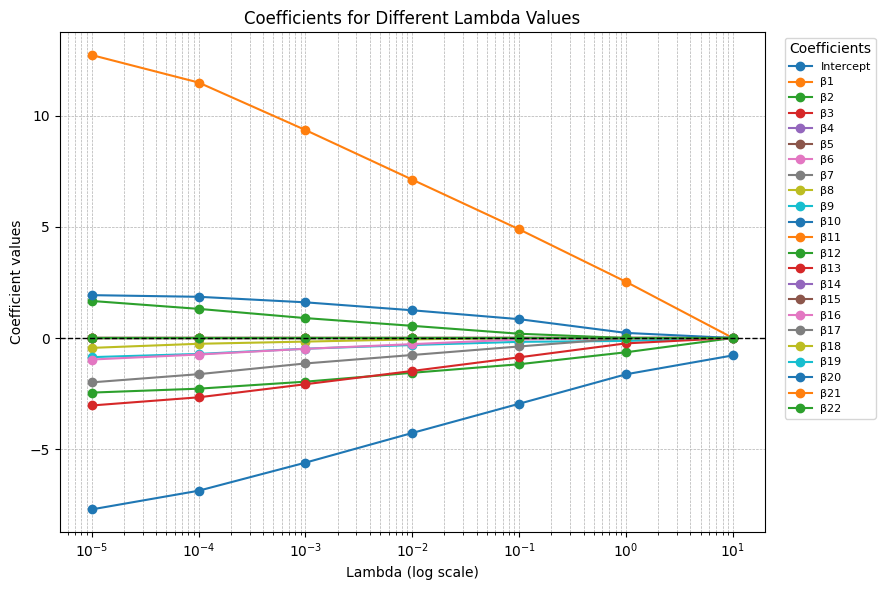

In [5]:
model.plot_coeff()

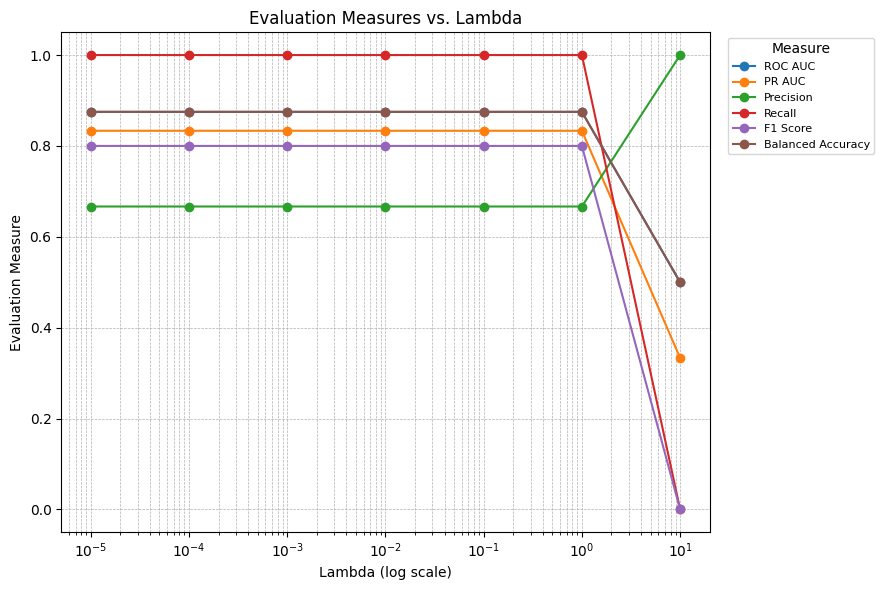

In [7]:
model.validate_and_plot_all(X_test, y_test)

In [10]:
# Compare with sklearn's LogisticRegression
y_pred = sklearn_model.predict(X_test)
y_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]


print("Sklearn Logistic Regression")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("F1 Score:", f1_score(y_test, y_pred))

Sklearn Logistic Regression
Balanced Accuracy: 0.875
ROC AUC: 0.875
F1 Score: 0.8
